# Random Forest Project 

For this project, I have utilized the publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. I have created a model that will help predict this.

This data of Lending club is from before they even went public. I have used lending data from 2007-2010 to classify and predict whether or not the borrower paid back their loan in full. The data can be downloaded from [here](https://www.lendingclub.com/info/download-data.action) or from the csv uploaded to the github repository of this project.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
loans = pd.read_csv('loan_data.csv')

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Exploratory Data Analysis

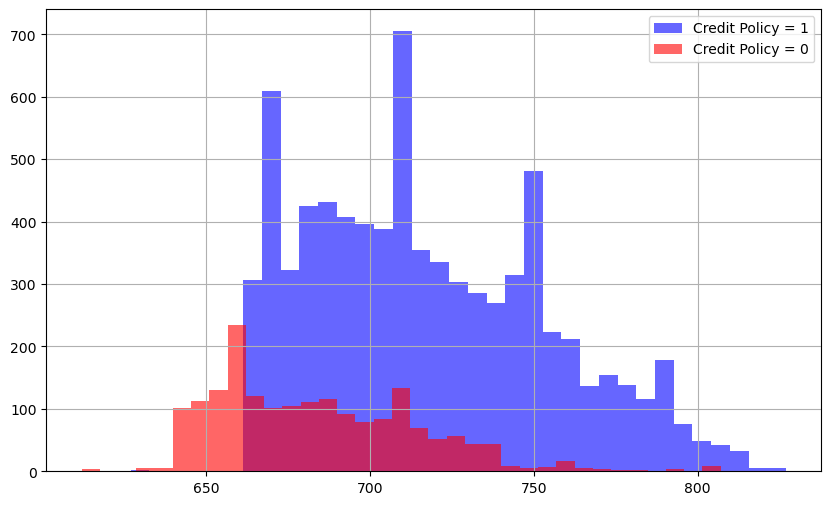

In [12]:
plt.figure(figsize=(10, 6))
loans[loans['credit.policy'] == 1]['fico'].hist(bins=35, color='blue', label='Credit Policy = 1', alpha=0.6)
loans[loans['credit.policy'] == 0]['fico'].hist(bins=35, color='red', label='Credit Policy = 0', alpha=0.6)
plt.legend()

### Interactive plot using cufflinks

In [14]:
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
from plotly.subplots import make_subplots

# Create a figure with two histograms
fig = make_subplots(rows=1, cols=1)

# Histogram for credit.policy == 1
fig.add_trace(go.Histogram(
    x=loans[loans['credit.policy'] == 1]['fico'],
    nbinsx=35,
    name='Credit Policy = 1',
    marker_color='blue',
    opacity=0.6
))

# Histogram for credit.policy == 0
fig.add_trace(go.Histogram(
    x=loans[loans['credit.policy'] == 0]['fico'],
    nbinsx=35,
    name='Credit Policy = 0',
    marker_color='red',
    opacity=0.6
))

# Update layout for better visualization
fig.update_layout(
    title_text='Distribution of FICO Scores by Credit Policy',
    xaxis_title_text='FICO Score',
    yaxis_title_text='Count',
    barmode='overlay',
    bargap=0.1
)

# Show legend
fig.update_layout(showlegend=True)

# Show the plot
fig.show()

In [19]:
fig = make_subplots(rows=1, cols=1)

# Histogram for not.fully.paid = 0
fig.add_trace(go.Histogram(
  x=loans[loans['not.fully.paid'] == 0]['fico'],
  nbinsx=50,
  name='not.fully.paid = 0',
  marker_color='blue',
  opacity=0.6
))

# Histogram for not.fully.paid = 1
fig.add_trace(go.Histogram(
  x=loans[loans['not.fully.paid']==1]['fico'],
  nbinsx=50,
  name='not.fully.paid = 1',
  marker_color='red',
  opacity=0.6     
))

# Update layout for better visualization
fig.update_layout(
  title_text='Distribution of FICO scores by the not.fully.paid column',
  xaxis_title_text='FICO Score',
  yaxis_title_text='Count',
  barmode='overlay',
  bargap=0.1
)

fig.update_layout(showlegend=True)
fig.show()

### Countplot showing the counts of loans by purpose, with the color hue defined by not.fully.paid

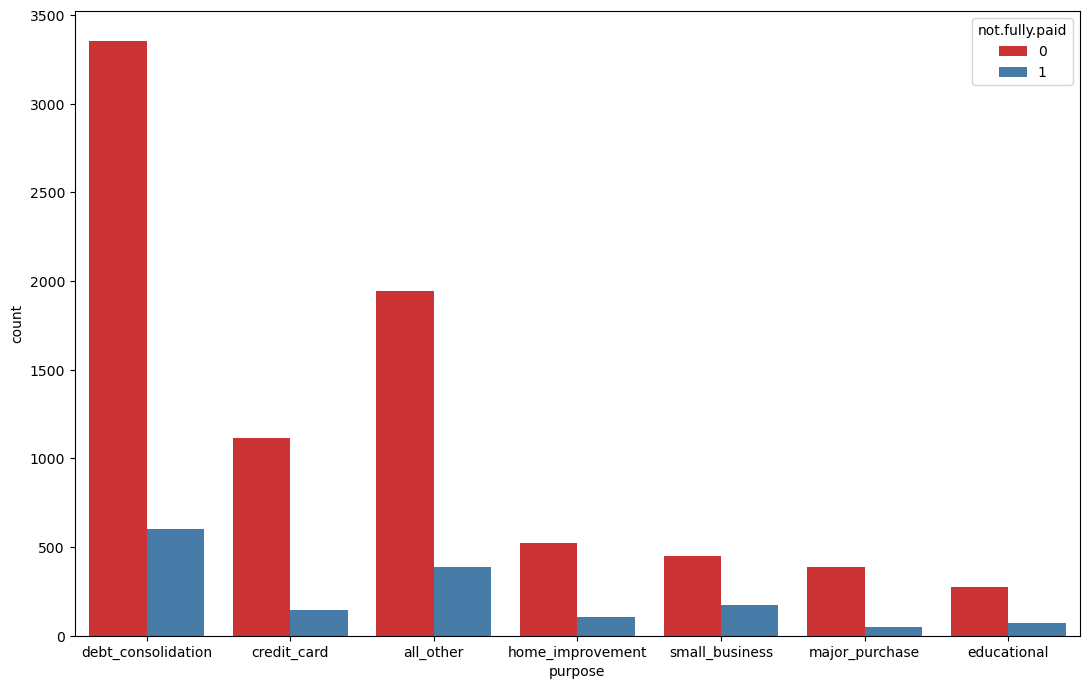

In [27]:
plt.figure(figsize=(11, 7))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='Set1')
plt.tight_layout()

In [28]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

### Jointplot to see the trend between FICO score and interest rate

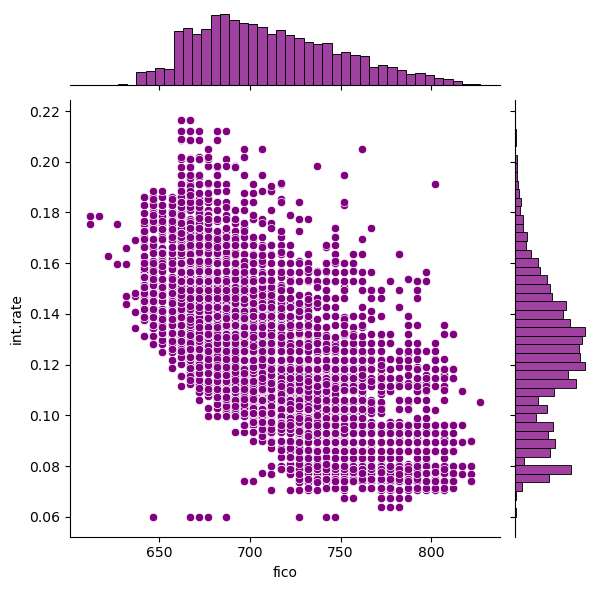

In [30]:
sns.jointplot(data=loans, x='fico', y='int.rate', color='purple')

### Lmplots to see if the trend differed between not.fully.paid and credit.policy

<Figure size 1100x700 with 0 Axes>

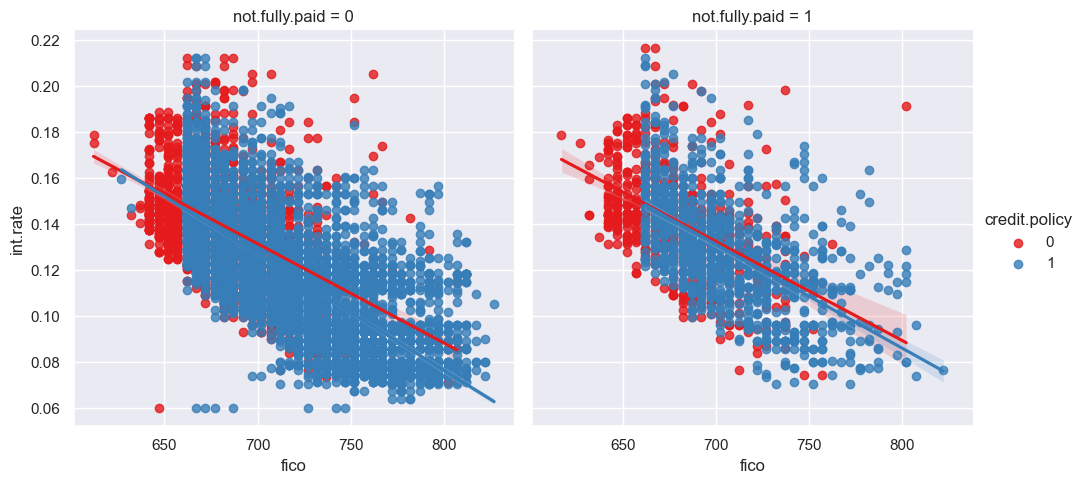

In [33]:
plt.figure(figsize=(11,7))
sns.set_theme()
sns.lmplot(data=loans, x='fico', y='int.rate', col='not.fully.paid', hue='credit.policy', palette='Set1')

In [34]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Categorical Features

The **purpose** column is categorical and hence it is transformed using dummy variables for sklearn to understand

In [35]:
cat_feats = ['purpose']

In [40]:
loans['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [38]:
final_data = pd.get_dummies(data=loans, columns=cat_feats, drop_first=True, dtype=int)

In [39]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [46]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training a Decision Tree Model

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree = DecisionTreeClassifier()

In [47]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree

In [57]:
pred = dtree.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [51]:
print(confusion_matrix(y_test, pred))

[[2004  427]
 [ 339  104]]


### Training a Random Forest model

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc = RandomForestClassifier()

In [54]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

### Predictions and Evaluation

In [56]:
rfc_pred = rfc.predict(X_test)

In [58]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.49      2874
weighted avg       0.81      0.85      0.78      2874



In [59]:
print(confusion_matrix(y_test, rfc_pred))

[[2422    9]
 [ 430   13]]
